In [82]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib widget

In [83]:
def diff_sar_step(vip, vin, vref, k):
    d = None
    
    if vip > vin:
        d = 1
        vip = vip - vref / (2 ** k)
    else:
        d = 0
        vin = vin - vref / (2 ** k)

    return d, vip, vin

def diff_sar_step_monotonic(vip, vin, vref, k):
    if k > 4:
        return diff_sar_step(vip, vin, vref, k)

    d = None
    
    if vip >= vin:
        d = 1
        vip = vip - vref / (2 ** (k + 1))
        vin = vin + vref / (2 ** (k + 1))
    else:
        d = 0
        vin = vin - vref / (2 ** (k + 1))
        vip = vip + vref / (2 ** (k + 1))

    return d, vip, vin

def result_convert(ds):
    result = 0
    for i in range(len(ds)):
        result += ds[i] * (2 ** (len(ds) - i - 1))
    return result

In [84]:
k = 1
n = 8
vref = 1.1
vip = 1.3
vin = 0.2

vips =[vip, vip]
vins =[vin, vin]
ds = []

while k < n:
    d, vip, vin = diff_sar_step(vip, vin, vref, k)
    vips.append(vip)
    vins.append(vin)
    ds.append(d)
    k += 1

d, _, _ = diff_sar_step(vip, vin, vref, k)
ds.append(d)
print(f"SAR result: 0x{result_convert(ds):X}")

SAR result: 0xFF


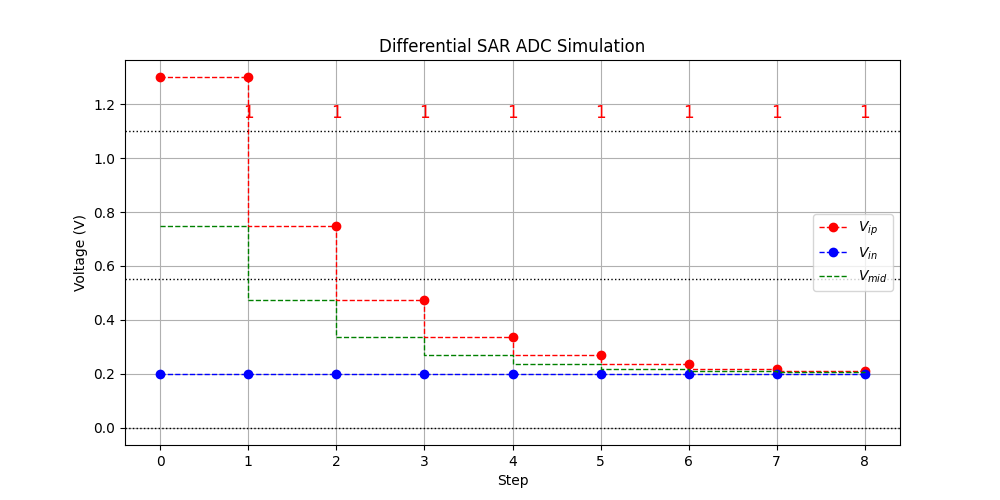

In [85]:
plt.figure(figsize=(10, 5))

# Plot the results
plt.plot(range(len(vips)), vips, label='$V_{{ip}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='red')
plt.plot(range(len(vins)), vins, label='$V_{{in}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='blue')
plt.plot(range(len(vins)), [(vip + vin) / 2 for vip, vin in zip(vips, vins)], label='$V_{{mid}}$', drawstyle='steps-pre', linestyle='--', linewidth=1, color='green')

# Add reference voltage lines
plt.axhline(y=vref, color='black', linestyle=':', linewidth=1)
plt.axhline(y=vref/2, color='black', linestyle=':', linewidth=1)
plt.axhline(y=0, color='black', linestyle=':', linewidth=1)

# Add step markers for decisions
for i, d in enumerate(ds):
    if d == 1:
        plt.text(i + 1, vref + 0.05, '1', fontsize=12, ha='center', color='red')
    else:
        plt.text(i + 1, vref + 0.05, '0', fontsize=12, ha='center', color='blue')


plt.title('Differential SAR ADC Simulation')
plt.xlabel('Step')
plt.ylabel('Voltage (V)')
plt.xticks(range(len(vips)))
plt.grid()
plt.legend()
plt.show()

In [86]:
k = 1
n = 8
vref = 1.3
vip = 0.2
vin = 1.3

vips =[vip, vip]
vins =[vin, vin]
ds = []

while k < n:
    d, vip, vin = diff_sar_step_monotonic(vip, vin, vref, k)
    vips.append(vip)
    vins.append(vin)
    ds.append(d)
    k += 1

d, _, _ = diff_sar_step_monotonic(vip, vin, vref, k)
ds.append(d)
print(f"SAR result: 0x{result_convert(ds):X}")

SAR result: 0x13


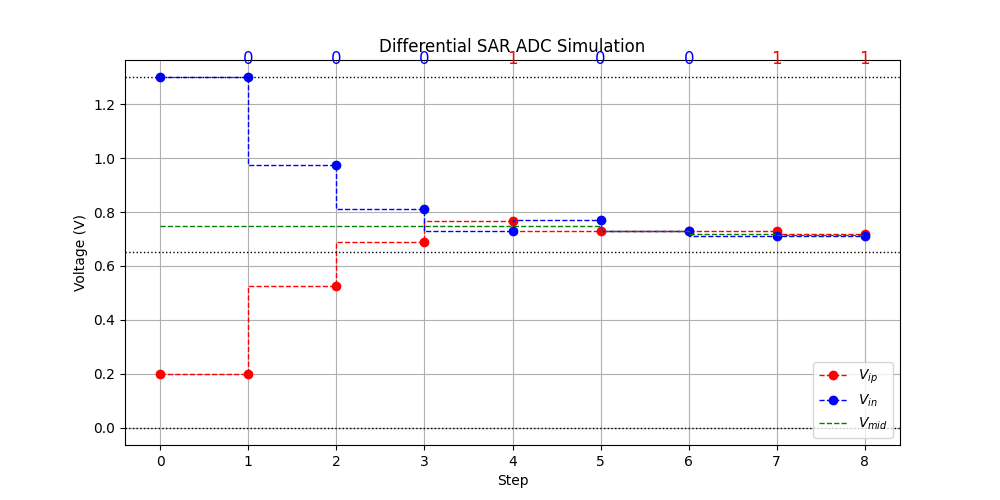

In [87]:
plt.figure(figsize=(10, 5))

# Plot the results
plt.plot(range(len(vips)), vips, label='$V_{{ip}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='red')
plt.plot(range(len(vins)), vins, label='$V_{{in}}$', marker='o', drawstyle='steps-pre', linestyle='--', linewidth=1, color='blue')
plt.plot(range(len(vins)), [(vip + vin) / 2 for vip, vin in zip(vips, vins)], label='$V_{{mid}}$', drawstyle='steps-pre', linestyle='--', linewidth=1, color='green')

# Add reference voltage lines
plt.axhline(y=vref, color='black', linestyle=':', linewidth=1)
plt.axhline(y=vref/2, color='black', linestyle=':', linewidth=1)
plt.axhline(y=0, color='black', linestyle=':', linewidth=1)

# Add step markers for decisions
for i, d in enumerate(ds):
    if d == 1:
        plt.text(i + 1, vref + 0.05, '1', fontsize=12, ha='center', color='red')
    else:
        plt.text(i + 1, vref + 0.05, '0', fontsize=12, ha='center', color='blue')


plt.title('Differential SAR ADC Simulation')
plt.xlabel('Step')
plt.ylabel('Voltage (V)')
plt.xticks(range(len(vips)))
plt.grid()
plt.legend()
plt.show()

In [88]:
k = 1

vref = 1.3
vp = 0.2
vn = 1.3

errors = [4]

print(f"Step 0:     ", end="")
print(f"vp: {vp:.2f}, vn: {vn:.2f}")
while k <= 8:
    if vp > vn:
        print(f"Step {k}:  1  ", end="")
        vp = vp - vref / (2 ** k)
        print(f"vp: {vp:.2f}, vn: {vn:.2f}")
    else:
        print(f"Step {k}:  0  ", end="")
        vn = vn - vref / (2 ** k)
        print(f"vp: {vp:.2f}, vn: {vn:.2f}")
    k += 1

Step 0:     vp: 0.20, vn: 1.30
Step 1:  0  vp: 0.20, vn: 0.65
Step 2:  0  vp: 0.20, vn: 0.33
Step 3:  0  vp: 0.20, vn: 0.16
Step 4:  1  vp: 0.12, vn: 0.16
Step 5:  0  vp: 0.12, vn: 0.12
Step 6:  0  vp: 0.12, vn: 0.10
Step 7:  1  vp: 0.11, vn: 0.10
Step 8:  1  vp: 0.10, vn: 0.10


In [89]:
def convert(vip, vin, vref=1.3, n=8):
    k = 1
    vips = [vip, vip]
    vins = [vin, vin]
    ds = []

    while k < n:
        d, vip, vin = diff_sar_step(vip, vin, vref, k)
        vips.append(vip)
        vins.append(vin)
        ds.append(d)
        k += 1

    d, _, _ = diff_sar_step(vip, vin, vref, k)
    ds.append(d)
    
    return result_convert(ds)

In [95]:
vdiffs = np.linspace(-1.1, 1.1, 16)
# print(vdiffs)
vips = (vdiffs + 1.5) / 2
vins = (1.5 - vdiffs) / 2
# print(vips)
# print(vins)

# print()

# expecteds = np.array([convert(vip, vin) for vip, vin in zip(vips, vins)]).astype(np.uint8)
expecteds = ((vdiffs + 1.1) / 2.2 * 255).astype(np.uint8)
expecteds_theo = np.linspace(0, 255, 16).astype(np.uint8)

print(expecteds)
print(expecteds_theo)

for exp, exp_theo in zip(expecteds, expecteds_theo):
    print(f"{exp:08b} (0x{exp:02X})   (0x{exp_theo:02X}) {exp_theo:08b}")

[  0  17  34  50  68  85 101 118 136 153 170 187 203 220 237 255]
[  0  17  34  51  68  85 102 119 136 153 170 187 204 221 238 255]
00000000 (0x00)   (0x00) 00000000
00010001 (0x11)   (0x11) 00010001
00100010 (0x22)   (0x22) 00100010
00110010 (0x32)   (0x33) 00110011
01000100 (0x44)   (0x44) 01000100
01010101 (0x55)   (0x55) 01010101
01100101 (0x65)   (0x66) 01100110
01110110 (0x76)   (0x77) 01110111
10001000 (0x88)   (0x88) 10001000
10011001 (0x99)   (0x99) 10011001
10101010 (0xAA)   (0xAA) 10101010
10111011 (0xBB)   (0xBB) 10111011
11001011 (0xCB)   (0xCC) 11001100
11011100 (0xDC)   (0xDD) 11011101
11101101 (0xED)   (0xEE) 11101110
11111111 (0xFF)   (0xFF) 11111111


In [91]:
vips = np.array(vips)
vins = np.array(vins)
vdiffs = vips - vins
expecteds = np.array(expecteds)

test_initial_time = 9
test_interval_time = 9


def generate_pwl(t_init: int, t_interval: int, voltages: np.ndarray) -> str:
    times = np.arange(t_init, t_init + len(voltages) * t_interval, t_interval)
    times = np.repeat(times, 2)
    times = np.insert(times, 0, 0)
    times = times[:-1]
    print(f"t_max: {times[-1]}")

    voltages = np.repeat(voltages, 2)

    result = "pwl("
    for t, v in zip(times, voltages):
        if t != 0:
            result += f"{{{t:d}/f}} {v:.2f} "
        else:
            result += f"0 {v:.2f} "

    return result.strip() + ")"

pwl_pos = generate_pwl(test_initial_time, test_interval_time, vips)
pwl_neg = generate_pwl(test_initial_time, test_interval_time, vins)

print(f"pwl_pos:\n\t{pwl_pos}")
print(f"pwl_neg:\n\t{pwl_neg}")

t_max: 108
t_max: 108
pwl_pos:
	pwl(0 0.20 {9/f} 0.20 {9/f} 0.30 {18/f} 0.30 {18/f} 0.40 {27/f} 0.40 {27/f} 0.50 {36/f} 0.50 {36/f} 0.60 {45/f} 0.60 {45/f} 0.70 {54/f} 0.70 {54/f} 0.80 {63/f} 0.80 {63/f} 0.90 {72/f} 0.90 {72/f} 1.00 {81/f} 1.00 {81/f} 1.10 {90/f} 1.10 {90/f} 1.20 {99/f} 1.20 {99/f} 1.30 {108/f} 1.30)
pwl_neg:
	pwl(0 1.30 {9/f} 1.30 {9/f} 1.20 {18/f} 1.20 {18/f} 1.10 {27/f} 1.10 {27/f} 1.00 {36/f} 1.00 {36/f} 0.90 {45/f} 0.90 {45/f} 0.80 {54/f} 0.80 {54/f} 0.70 {63/f} 0.70 {63/f} 0.60 {72/f} 0.60 {72/f} 0.50 {81/f} 0.50 {81/f} 0.40 {90/f} 0.40 {90/f} 0.30 {99/f} 0.30 {99/f} 0.20 {108/f} 0.20)


In [92]:
# measurements = [
#     0x00, 0x0F, 0x20, 0x31, 0x43, 0x54, 0x66, 0x77, 0x88, 0x99, 0xAB, 0xBC, 0xCE, 0xDF, 0xF0, 0xFF
# ]
old = [
    0x00, 0x16, 0x2D, 0x45, 0x5C, 0x74, 0x8B, 0xA3, 0xBA, 0xD2, 0xE9, 0xFF
]

# new = [
#     0x10, 0x21, 0x32, 0x43, 0x54, 0x66, 0x77, 0x88, 0x99, 0xAB, 0xBC, 0xCD, 0xDE, 0xEF
# ]

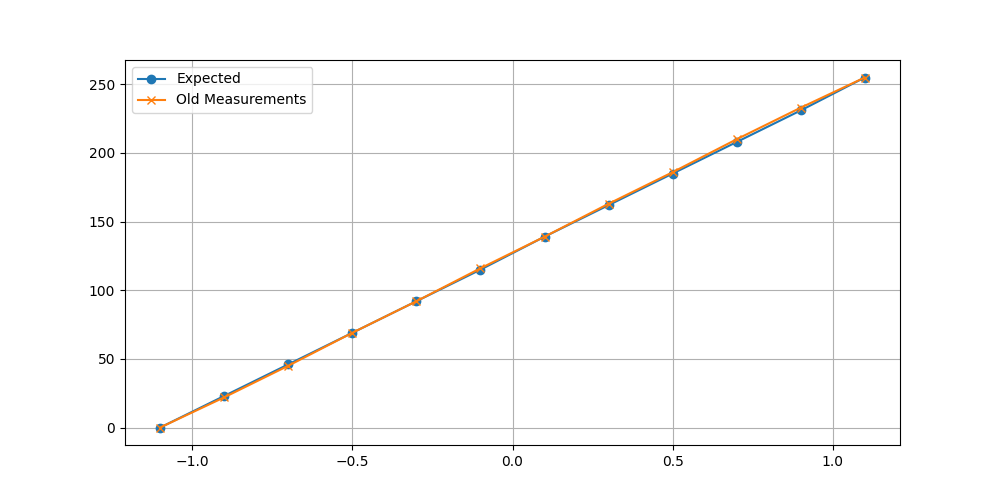

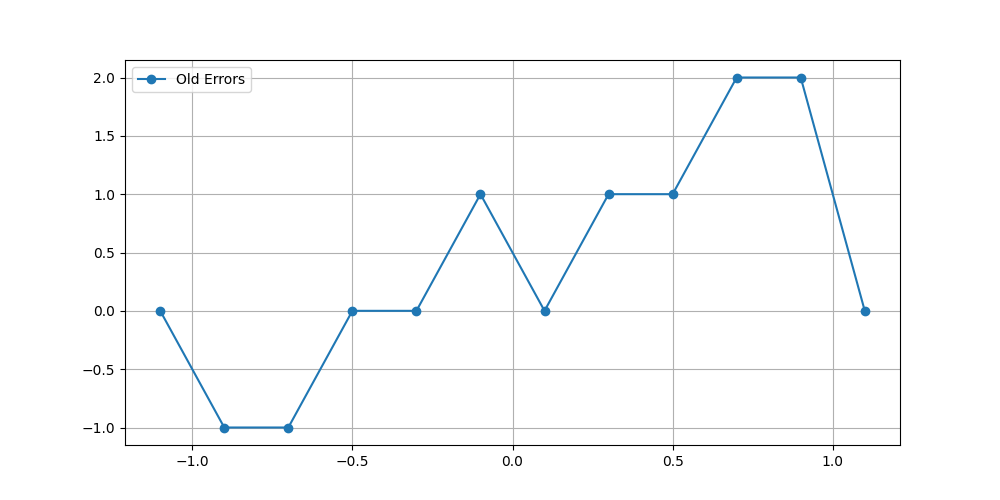

In [93]:
old = np.array(old)
# new = np.array(new)

plt.figure(figsize=(10, 5))
plt.plot(vdiffs, expecteds, "o-", label="Expected")
plt.plot(vdiffs, old, "x-", label="Old Measurements")
# plt.plot(vdiffs, new, "x-", label="New Measurements")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(vdiffs, old - expecteds, "o-", label="Old Errors")
# plt.plot(vdiffs, new - expecteds, "o-", label="New Errors")
plt.legend()
plt.grid()
plt.show()

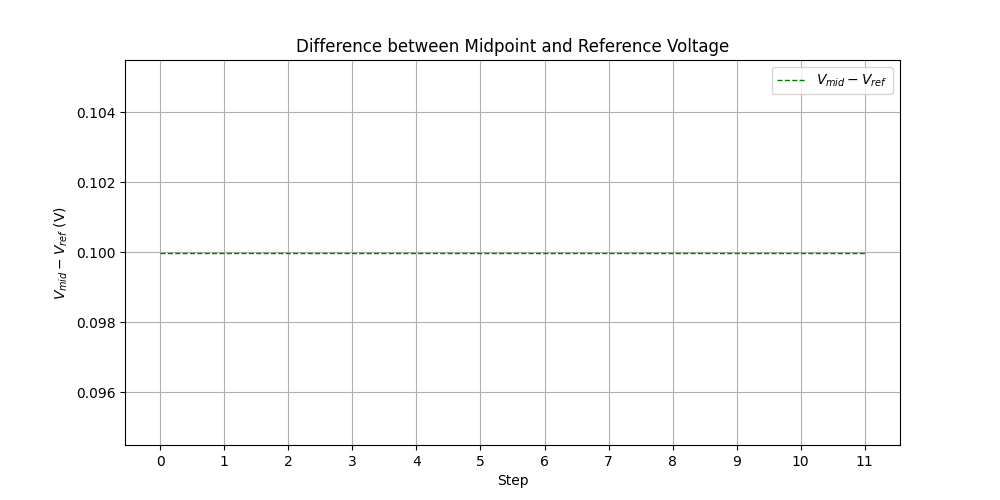

In [94]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(vins)), [(vip + vin) / 2 - vref / 2 for vip, vin in zip(vips, vins)], label='$V_{{mid}} - V_{{ref}}$', drawstyle='steps-pre', linestyle='--', linewidth=1, color='green')
plt.title('Difference between Midpoint and Reference Voltage')
plt.xlabel('Step')
plt.ylabel('$V_{{mid}} - V_{{ref}}$ (V)')
plt.xticks(range(len(vins)))
plt.grid()
plt.legend()
plt.show()